<a href="https://colab.research.google.com/github/victen18/Colab_Notebook_Projects/blob/main/Time_Series_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install git+https://github.com/ourownstory/neural_prophet.git

In [59]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
import datetime as dt

from neuralprophet import NeuralProphet

pd.plotting.register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/BeerWineLiquor.csv')

In [4]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [6]:
df.columns = ['ds','y']

In [7]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [8]:
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [23]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [11]:
m = Prophet()

In [12]:
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = m.make_future_dataframe(periods=24,freq='MS')

In [14]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [15]:
len(df),len(future)

(324, 348)

In [16]:
forecast = m.predict(future)

In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1774.512619,1132.641279,1461.106303,1774.512619,1774.512619,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,-461.755050,0.0,0.0,0.0,1312.757569
1,1992-02-01,1777.322689,1182.199681,1514.484445,1777.322689,1777.322689,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,-427.146658,0.0,0.0,0.0,1350.176031
2,1992-03-01,1779.951464,1430.913960,1761.614487,1779.951464,1779.951464,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,-178.912314,0.0,0.0,0.0,1601.039150
3,1992-04-01,1782.761533,1421.866536,1755.284847,1782.761533,1782.761533,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,-196.056786,0.0,0.0,0.0,1586.704747
4,1992-05-01,1785.480956,1666.232199,1978.196709,1785.480956,1785.480956,45.197326,45.197326,45.197326,45.197326,45.197326,45.197326,0.0,0.0,0.0,1830.678281


In [18]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [19]:
forecast[['ds','yhat_lower', 'yhat_upper','yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
343,2020-08-01,5074.496996,5403.304416,5240.612763
344,2020-09-01,4918.163165,5234.570585,5083.379410
345,2020-10-01,5035.884208,5345.869221,5188.922115
346,2020-11-01,5177.044318,5495.179332,5336.217749
347,2020-12-01,6172.369352,6481.544055,6334.440008


(735234.0, 737791.0)

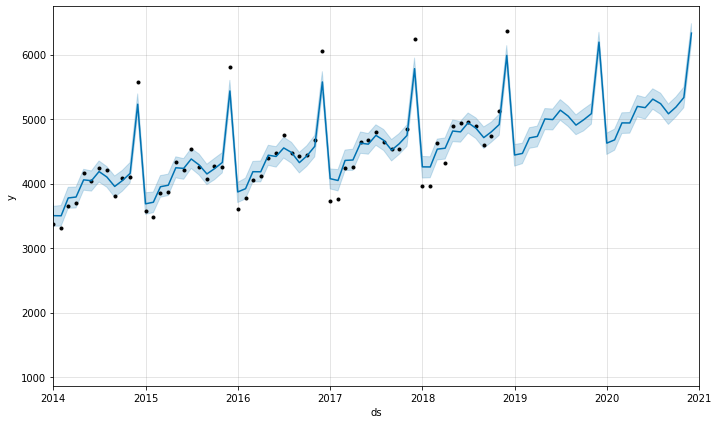

In [20]:
%matplotlib inline
m.plot(forecast)
plt.xlim('2014-01-01','2021-01-01')

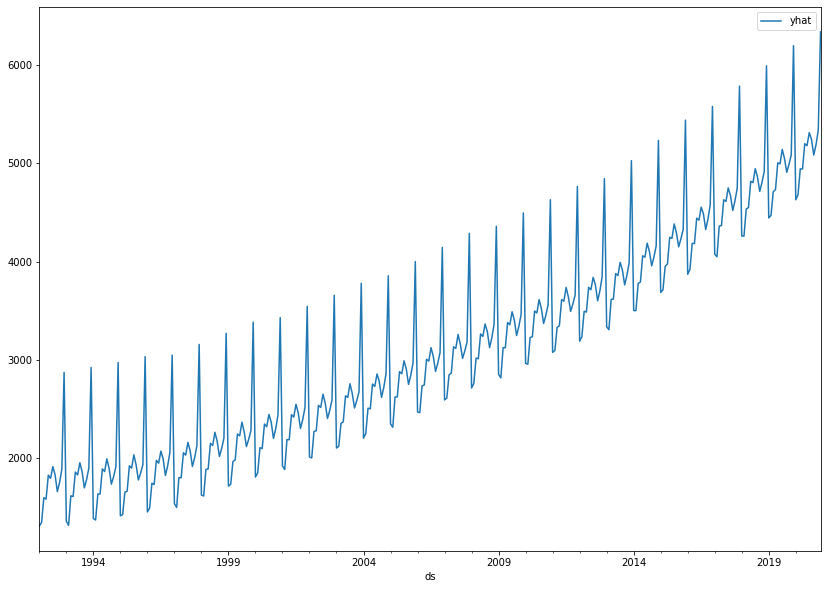

In [31]:
forecast.plot(x='ds',y='yhat',figsize=(14,10))
plt.show()

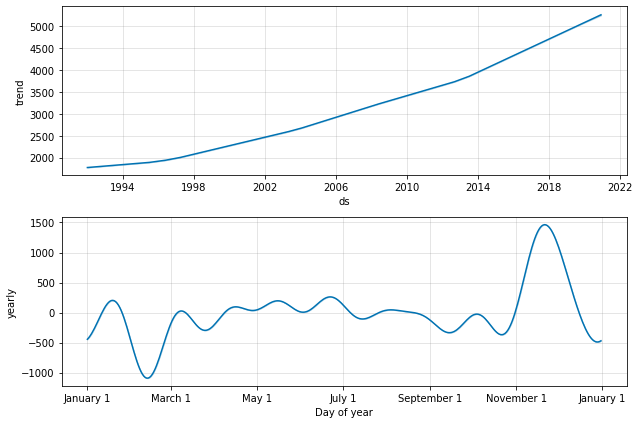

In [22]:
m.plot_components(forecast);

In [32]:
df = pd.read_csv('/content/Miles_Traveled.csv')

In [33]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [35]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [36]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


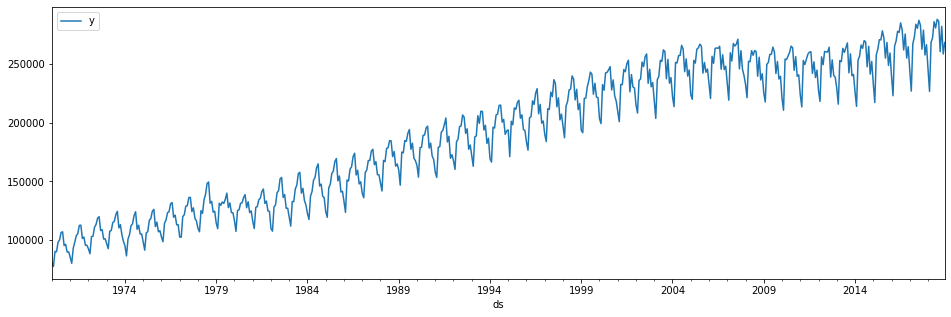

In [41]:
df.plot(x='ds',y='y',figsize=(16,5))
plt.show()

In [42]:
len(df)

588

In [45]:
train = df.iloc[:576]
test = df.iloc[576:]

In [46]:
train.shape,test.shape

((576, 2), (12, 2))

In [47]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263457.725002,274455.115274,285396.663126,263398.347906,263499.029529,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,16443.644514,0.0,0.0,0.0,279901.369516
584,2018-09-01,263600.413936,256302.428686,268171.969115,263513.243359,263666.976204,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,-1674.285262,0.0,0.0,0.0,261926.128674
585,2018-10-01,263738.500000,263315.518120,275015.960969,263628.743502,263836.125942,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,5300.999421,0.0,0.0,0.0,269039.499421
586,2018-11-01,263881.188934,250040.906252,261352.604765,263737.613640,264011.471382,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,-8214.645301,0.0,0.0,0.0,255666.543633
587,2018-12-01,264019.274999,251354.551141,262658.355609,263842.534285,264195.582020,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,-6925.081926,0.0,0.0,0.0,257094.193073


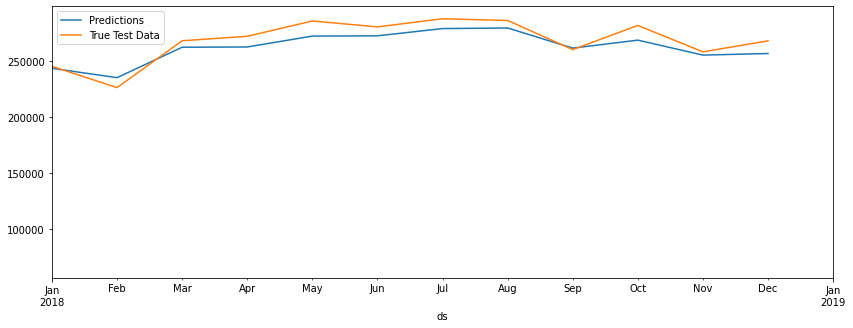

In [51]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(14,5))
test.plot(x='ds',y='y',label='True Test Data',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [52]:
from statsmodels.tools.eval_measures import rmse

In [53]:
predictions = forecast.iloc[-12:]['yhat']

In [54]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [55]:
predictions

576    243890.540695
577    235518.185920
578    262721.044615
579    262926.543476
580    272653.963220
581    272904.801470
582    279365.372083
583    279901.369516
584    261926.128674
585    269039.499421
586    255666.543633
587    257094.193073
Name: yhat, dtype: float64

In [56]:
rmse(predictions,test['y'])

8588.50451989775

In [60]:
test.mean()

y    268739.666667
dtype: float64

In [61]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [64]:
#INITIAL
initial = 5*365
initial = str(initial)+' days'

#PERIOD
period = 5*365
period = str(period)+' days'

#HORIZON
horizon = 365
horizon = str(horizon)+' days'

In [65]:
df_cv = cross_validation(m,horizon=horizon,period=period,initial=initial)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

In [66]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087478,107117.596528,109816.764452,102445.0,1976-12-11
1,1977-02-01,102996.111557,101525.796300,104379.360822,102416.0,1976-12-11
2,1977-03-01,118973.318267,117445.686521,120467.137517,119960.0,1976-12-11
3,1977-04-01,120612.923861,119145.794916,122178.341120,121513.0,1976-12-11
4,1977-05-01,127883.031986,126377.223740,129301.055777,128884.0,1976-12-11


In [67]:
len(df_cv)

108

In [68]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,coverage
0,52 days,2.430030e+07,4929.533140,4534.578066,0.027790,0.023419,0.4
1,53 days,2.180221e+07,4669.283718,4269.242480,0.025045,0.023419,0.4
2,54 days,1.835927e+07,4284.771500,3749.319270,0.020183,0.022331,0.5
3,55 days,2.318231e+07,4814.801050,4262.593972,0.023194,0.023419,0.4
4,57 days,2.101189e+07,4583.872792,4000.766561,0.021482,0.022331,0.5
...,...,...,...,...,...,...,...
94,360 days,1.833685e+07,4282.155252,3750.317263,0.019550,0.019595,0.5
95,361 days,1.744517e+07,4176.741529,3472.704963,0.018164,0.018940,0.5
96,362 days,3.175299e+07,5634.978870,4397.649029,0.021959,0.024754,0.4
97,364 days,3.001684e+07,5478.762932,4235.776363,0.021356,0.021737,0.5


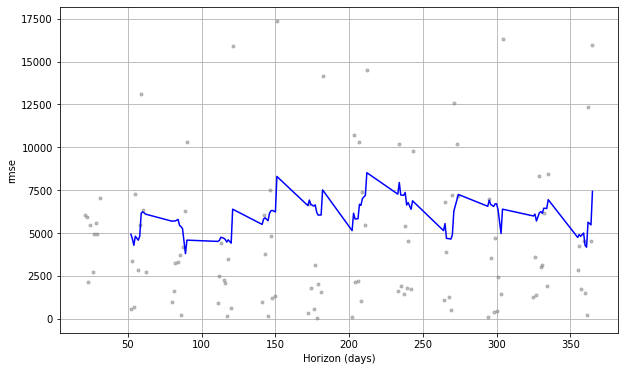

In [70]:
plot_cross_validation_metric(df_cv,metric='rmse');

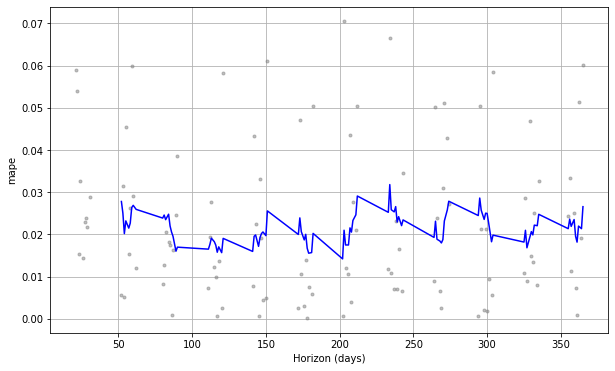

In [73]:
plot_cross_validation_metric(df_cv,metric='mape');

In [74]:
df = pd.read_csv('/content/HospitalityEmployees.csv')

In [75]:
df.head()

,Date,Employees
0,1/1/1990,1064.5
1,2/1/1990,1074.5
2,3/1/1990,1090.0
3,4/1/1990,1097.4
4,5/1/1990,1108.7


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       348 non-null    object 
 1   Employees  348 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.6+ KB


In [78]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

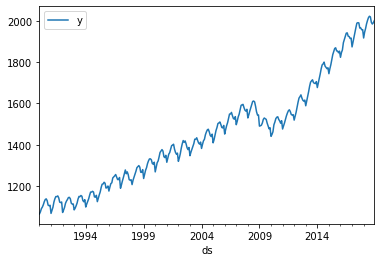

In [79]:
df.plot(x='ds',y='y')

In [80]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


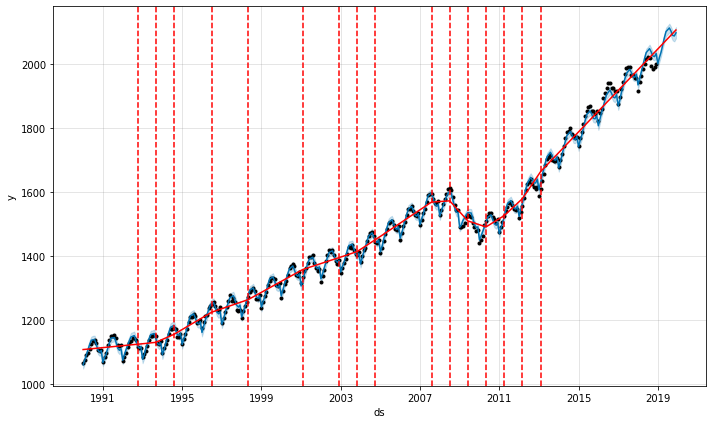

In [81]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),m,forecast)

In [82]:
df = pd.read_csv('/content/airline_passengers.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [85]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [87]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


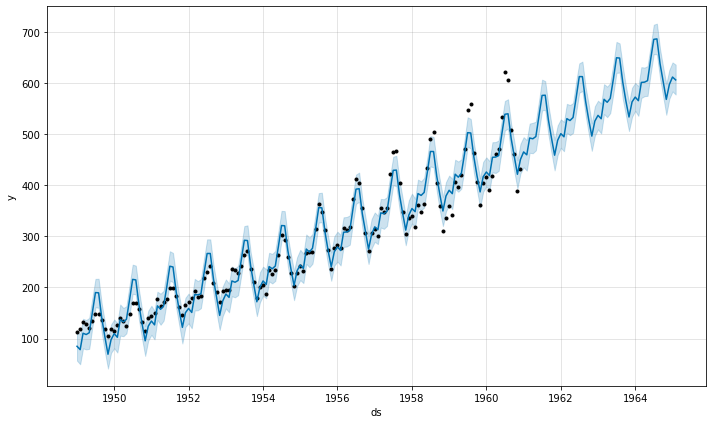

In [86]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

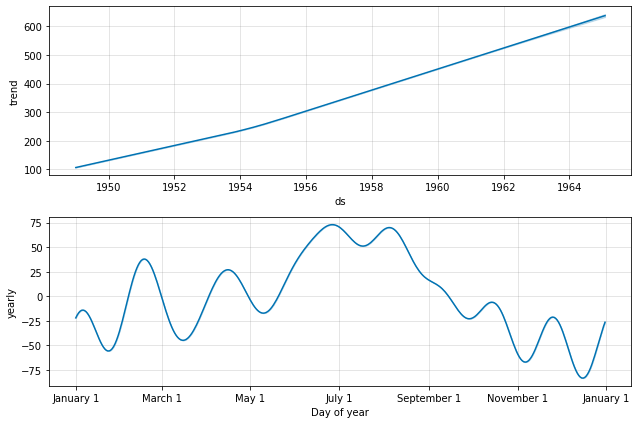

In [89]:
fig = m.plot_components(forecast);

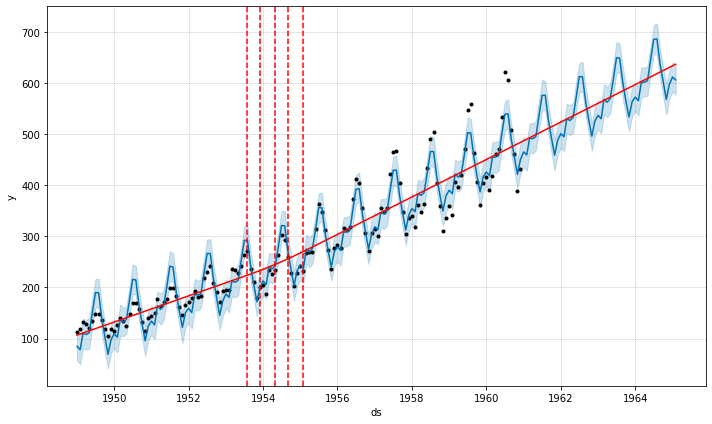

In [91]:
  from fbprophet.plot import add_changepoints_to_plot
  fig = m.plot(forecast)
  a = add_changepoints_to_plot(fig.gca(),m,forecast)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


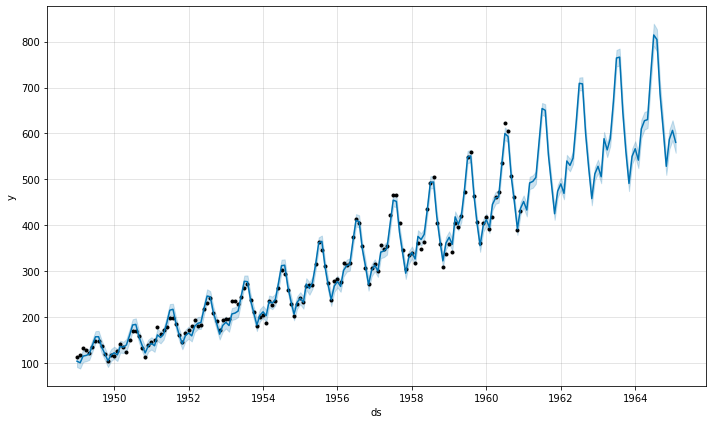

In [92]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(50,freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

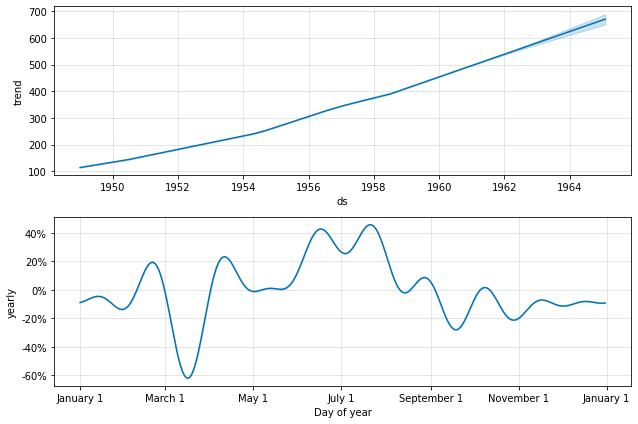

In [93]:
fig = m.plot_components(forecast)